In [121]:
!python -V

Python 3.10.8


In [122]:
import pandas as pd
import numpy as np

In [123]:
import pickle

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [126]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
print(df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  Rat

In [127]:
df.columns.nunique()

19

In [128]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
duration_std = np.std(df.duration)
duration_std

42.59434429744777

<Axes: ylabel='Density'>

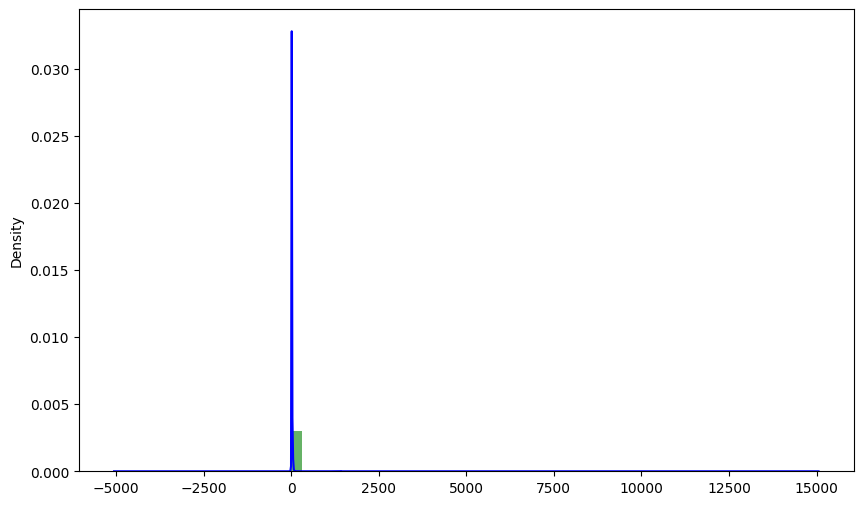

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=30, density=True, alpha=0.6, color='g', label='Histogram')
df['duration'].plot(kind='kde', color='blue', label='Density')

In [130]:
length1 = len(df.duration)
length1
df2 = df[(df.duration >= 1) & (df.duration <= 60)]
length2  = len(df2.duration)
length2
fraction = length2/length1
print(fraction)

0.9812202822125979


New histogram

<Axes: ylabel='Density'>

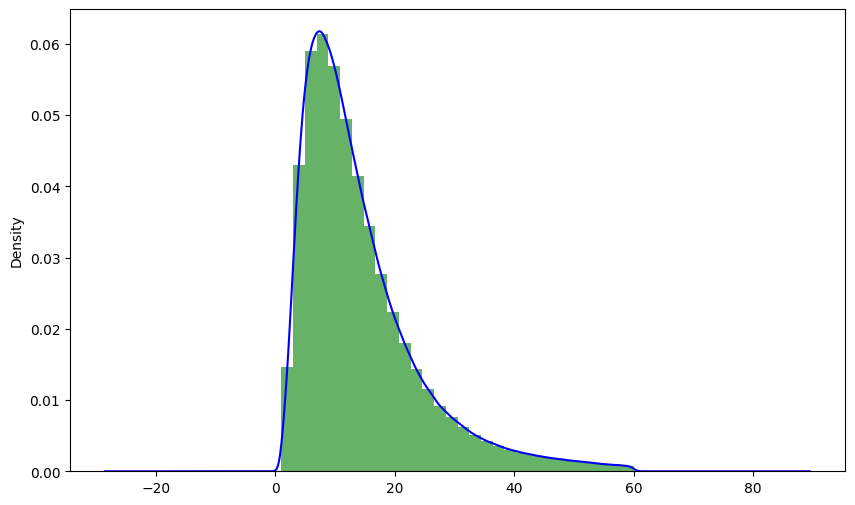

In [131]:
plt.figure(figsize=(10, 6))
plt.hist(df2['duration'], bins=30, density=True, alpha=0.6, color='g', label='Histogram')
df2['duration'].plot(kind='kde', color='blue', label='Density')

In [59]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [89]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df2[categorical] = df2[categorical].astype(str)

/var/folders/bl/flyjs4c14zv14v64d_y74czm0000gn/T/ipykernel_74310/3562174876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[categorical] = df2[categorical].astype(str)


In [90]:
df2[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3009173 entries, 0 to 3066765
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   PULocationID  object
 1   DOLocationID  object
dtypes: object(2)
memory usage: 68.9+ MB


In [91]:
df2[categorical + numerical]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
1,43,237,1.10
2,48,238,2.51
3,138,7,1.90
4,107,79,1.43
...,...,...,...
3066761,107,48,3.05
3066762,112,75,5.80
3066763,114,239,4.67
3066764,230,79,3.15


In [92]:
train_dicts = df2[categorical + numerical].to_dict(orient='records')
train_dicts

[{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97},
 {'PULocationID': '43', 'DOLocationID': '237', 'trip_distance': 1.1},
 {'PULocationID': '48', 'DOLocationID': '238', 'trip_distance': 2.51},
 {'PULocationID': '138', 'DOLocationID': '7', 'trip_distance': 1.9},
 {'PULocationID': '107', 'DOLocationID': '79', 'trip_distance': 1.43},
 {'PULocationID': '161', 'DOLocationID': '137', 'trip_distance': 1.84},
 {'PULocationID': '239', 'DOLocationID': '143', 'trip_distance': 1.66},
 {'PULocationID': '142', 'DOLocationID': '200', 'trip_distance': 11.7},
 {'PULocationID': '164', 'DOLocationID': '236', 'trip_distance': 2.95},
 {'PULocationID': '141', 'DOLocationID': '107', 'trip_distance': 3.01},
 {'PULocationID': '234', 'DOLocationID': '68', 'trip_distance': 1.8},
 {'PULocationID': '79', 'DOLocationID': '264', 'trip_distance': 7.3},
 {'PULocationID': '164', 'DOLocationID': '143', 'trip_distance': 3.23},
 {'PULocationID': '138', 'DOLocationID': '33', 'trip_distance': 11.43},
 {'

In [93]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
print(X_train)


  (0, 43)	1.0
  (0, 325)	1.0
  (0, 515)	0.97
  (1, 148)	1.0
  (1, 456)	1.0
  (1, 515)	1.1
  (2, 149)	1.0
  (2, 461)	1.0
  (2, 515)	2.51
  (3, 227)	1.0
  (3, 299)	1.0
  (3, 515)	1.9
  (4, 237)	1.0
  (4, 266)	1.0
  (4, 515)	1.43
  (5, 38)	1.0
  (5, 325)	1.0
  (5, 515)	1.84
  (6, 45)	1.0
  (6, 409)	1.0
  (6, 515)	1.66
  (7, 108)	1.0
  (7, 304)	1.0
  (7, 515)	11.7
  (8, 147)	1.0
  :	:
  (3009164, 515)	9.44
  (3009165, 54)	1.0
  (3009165, 326)	1.0
  (3009165, 515)	0.0
  (3009166, 64)	1.0
  (3009166, 482)	1.0
  (3009166, 515)	0.0
  (3009167, 46)	1.0
  (3009167, 401)	1.0
  (3009167, 515)	0.82
  (3009168, 203)	1.0
  (3009168, 266)	1.0
  (3009168, 515)	3.05
  (3009169, 233)	1.0
  (3009169, 271)	1.0
  (3009169, 515)	5.8
  (3009170, 150)	1.0
  (3009170, 273)	1.0
  (3009170, 515)	4.67
  (3009171, 237)	1.0
  (3009171, 400)	1.0
  (3009171, 515)	3.15
  (3009172, 45)	1.0
  (3009172, 435)	1.0
  (3009172, 515)	2.85


In [94]:
X_train.shape

(3009173, 516)

In [95]:
target = 'duration'
y_train = df2[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.65840506917767

/var/folders/bl/flyjs4c14zv14v64d_y74czm0000gn/T/ipykernel_74310/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/Users/niko/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/niko/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

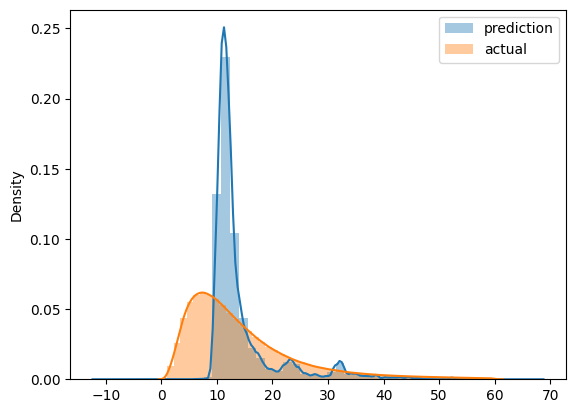

In [96]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [111]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [112]:
df_train = read_dataframe('./data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('./data/yellow_tripdata_2023-02.parquet')

In [113]:
len(df_train), len(df_val)

(3009173, 2855951)

In [114]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [132]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [133]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [134]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.247444184565642